In [1]:
import os
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import pandas as pd
# Cf. librairie cv pour détourage
"""
A faire
- nettoyer DataSet (supprimer les photos qui servent à rien e.g. trop sombres)
- détourer photos [tâche ED]
- resizer les photos
- mettre en N&B
"""

2023-06-20 18:29:16.517144: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 18:29:16.596407: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 18:29:17.037124: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 18:29:17.039330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 18:29:19.985303: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

'\nA faire\n- nettoyer DataSet (supprimer les photos qui servent à rien e.g. trop sombres)\n- détourer photos [tâche ED]\n- resizer les photos\n- mettre en N&B\n'

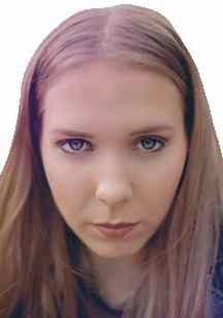

In [2]:
Image.open('../data/raw_data/FS2K/photo/photo2/image0001.jpg')

In [3]:
sketch_dir = '../data/raw_data/FS2K/sketch'
photos_dir = '../data/raw_data/FS2K/photo'
sketch_array = []
images_array = []
for subdirectory in range(1,4):
    sketch_subdirectory = os.path.join(sketch_dir, 'sketch' + str(subdirectory))
    for sketch in os.listdir(sketch_subdirectory):
        if sketch.endswith('.jpg') :
            sketch_path = os.path.join(sketch_subdirectory, sketch)
            image_path = os.path.join(photos_dir, 'photo' + str(subdirectory), 'image' + str(sketch[6:-4]) +'.jpg')
            img = Image.open(image_path)
            ske =Image.open(sketch_path)  
            sketch_array.append(ske)
            images_array.append(img)

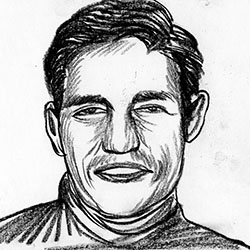

In [4]:
sketch_array[1]

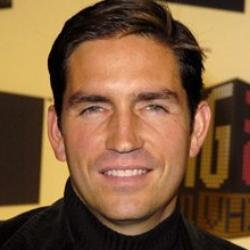

In [5]:
images_array[1]

In [6]:
len(sketch_array) == len(images_array)

True

In [7]:
f'Le DataSet FS2K contient {len(sketch_array)} paires images/sketches'

'Le DataSet FS2K contient 2006 paires images/sketches'

In [ ]:
shape_list = []
for i,(sketch,image) in enumerate(zip(sketch_array, images_array)):
    shape_list.append((np.array(sketch).shape, np.array(image).shape))

In [ ]:
# Check the size of the images
set(shape_list)

In [ ]:
size_pictures = np.unique(np.array(shape_list), axis=0, return_counts=True)
size_pictures

In [ ]:
print(f"""
Le Dataset FS2K contient :
- {size_pictures[1][0]} paires au format {size_pictures[0][0][0][0]}*{size_pictures[0][0][0][1]}
- {size_pictures[1][1]} paires au format {size_pictures[0][1][0][0]}*{size_pictures[0][1][0][1]}
""")

In [ ]:
fig,axs = plt.subplots(2, 2)
i = 0
j = 0
for n,(sketch,image) in enumerate(zip(sketch_array, images_array)):
    if n > 1 :
        break
    else:
        if j < 2:
            axs[i,j].imshow(sketch)
            axs[i,j+1].imshow(image)
            j += 2
        else:
            i += 1
            j = 0
            axs[i,j].imshow(sketch)
            axs[i,j+1].imshow(image)
            j += 2       

In [ ]:
index_deb = 28
for sketch,image in zip(sketch_array[index_deb : index_deb+30], images_array[index_deb : index_deb+30]):
    fig,axs = plt.subplots(1, 2)
    axs[0].imshow(sketch)
    axs[1].imshow(image)

In [ ]:
anno_train_df = pd.read_json('../data/raw_data/FS2K/anno_train.json')

In [ ]:
anno_train_df.head()

In [ ]:
anno_train_df.info()

In [ ]:
dico_tag = {
    'hair':{'0':'with hair', '1':'without hair'},
    'hair_color':{'0': 'brown', '1': 'black', '2': 'red', '3': 'no-hair', '4': 'golden'},
    'gender':{'0':'male','1':'female'},
    'earring':{'0': 'with earring', '1': 'without earring'},
    'smile':{'0': 'with smile', '1': 'without smile'},
    'frontal_face': {'0': 'head rotates within 30 degrees', '1': '> 30 degrees'},
    'style': {'0':'0','1':'1','2':'2'}
}

In [ ]:
nb_bald = len(anno_train_df.loc[anno_train_df['hair'] == 1])
nb_hair = len(anno_train_df.loc[anno_train_df['hair'] == 0])
x_hair = [nb_bald, nb_hair]

In [ ]:
dict_tags = dict(anno_train_df.select_dtypes(include='int64').nunique())

In [ ]:
list_tags = anno_train_df.select_dtypes(include='int64').columns

In [ ]:
fig,axs = plt.subplots(4,2, figsize = (30,50))
i = 0
j = 0
for tag in dict_tags:
    if j >= 2:
        i += 1
        j = 0 
    
    ax = axs[i,j]
    ax.set_title(tag, fontsize = 40)
    
    j += 1
    
    if dict_tags[tag] == 2:
        nb_0 = len(anno_train_df.loc[anno_train_df[tag] == 0])
        nb_1 = len(anno_train_df.loc[anno_train_df[tag] == 1])
        x = [nb_0,nb_1]
        labels = [dico_tag[tag]['0'],dico_tag[tag]['1']]
        ax.pie(x,labels=labels, textprops={'fontsize': 25}, labeldistance = 0.2)
    else:
        ax.tick_params(axis='both', labelsize = 20)
        # ax.set_xticks(ticks = list(range(dict_tags[tag])), labels = [str(tick) for tick in list(range(dict_tags[tag]))])
        ax.set_xticks(ticks = list(range(len(dico_tag[tag]))), labels = list(dico_tag[tag].values()))
        ax.hist(anno_train_df[tag])

## Suppression des arrière-plans à l'aide de la librairie rembg

In [42]:
from rembg import remove, new_session
from pathlib import Path
import time

In [36]:
input = Image.open('../data/raw_data/FS2K/photo/photo1/image0001.jpg')

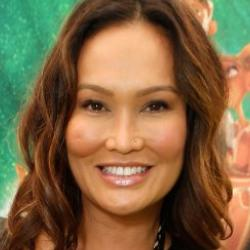

In [37]:
input

In [39]:
type(input)

PIL.JpegImagePlugin.JpegImageFile

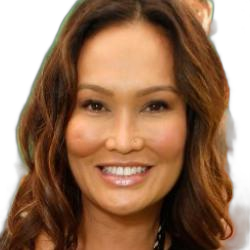

In [38]:
output = remove(input)
output

In [22]:
type(output)

PIL.Image.Image

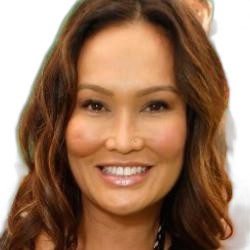

In [40]:
output = remove(input,bgcolor=(255, 255, 255, 255)) # pour obtenir un fond blanc plutôt qu'un fond transparent
output

On souhaite appliquer ce type de transformation à l'ensemble des photos du dossier FS2K<br>
Comparons les performances de 2 approches différentes sur un set de 5 photos

In [55]:
start_time = time.time()
for i in range(1,6):
    print(f'>>>>>> start processing photo {i} ...')
    input = Image.open(f'../data/raw_data/FS2K/photo/photo1/image000{i}.jpg')
    output = remove(input,bgcolor=(255, 255, 255, 255))
    output = output.convert('RGB')
    output.save(f'../data/processed_data/FS2K/photo/photo1/image000{i}.jpg')
end_time = time.time()
duration = end_time - start_time
print(f'duration {duration} seconds')

>>>>>> start processing photo 1 ...
>>>>>> start processing photo 2 ...
>>>>>> start processing photo 3 ...
>>>>>> start processing photo 4 ...
>>>>>> start processing photo 5 ...
duration 8.135698795318604 seconds


In [54]:
start_time = time.time()
session = new_session()
count = 0
for file in Path('../data/raw_data/FS2K/photo/test/').glob('*.jpg'):
    print(f'processing {file}')
    input_path = str(file)
    output_path = f'../data/processed_data/FS2K/photo/photo1/{file.stem}.jpg'
    with open(input_path, 'rb') as i:
        with open(output_path, 'wb') as o:
            input = i.read()
            output = remove(input, session=session,bgcolor=(255, 255, 255, 255))
            o.write(output)
end_time = time.time()
duration = end_time - start_time
print(f'duration {duration} seconds')

processing ../data/raw_data/FS2K/photo/test/image0002.jpg
processing ../data/raw_data/FS2K/photo/test/image0003.jpg
processing ../data/raw_data/FS2K/photo/test/image0001.jpg
processing ../data/raw_data/FS2K/photo/test/image0004.jpg
processing ../data/raw_data/FS2K/photo/test/image0005.jpg
duration 3.917788505554199 seconds


La deuxième méthode est nettement plus rapide mais génère des images 10 fois plus volumineuses